In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyExSi as es

# Showcase

## Burst random

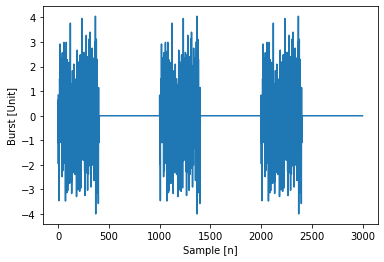

In [2]:
N = 1000
amplitude = 5
burst_random = es.burst_random(N, A=amplitude, ratio=0.4, distribution='normal', n_bursts=3)
plt.plot(burst_random)
plt.xlabel('Sample [n]')
plt.ylabel('Burst [Unit]')
plt.show()

## Sweep-sine

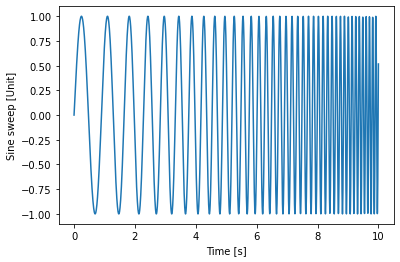

In [3]:
t = np.linspace(0, 10, 2000)
sweep = es.sine_sweep(time=t, freq_start=1, freq_stop=10, mode='logarithmic')
plt.plot(t, sweep)
plt.xlabel('Time [s]')
plt.ylabel('Sine sweep [Unit]')
plt.show()

## Uniform random, normal random and pseudo random

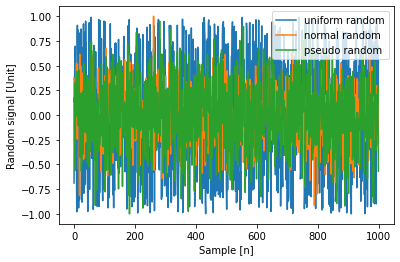

In [4]:
N = 1000
uniform_random = es.uniform_random(N=N)
normal_random = es.normal_random(N=N)
pseudo_random = es.pseudo_random(N=N)
plt.plot(uniform_random, label='uniform random')
plt.plot(normal_random, label='normal random')
plt.plot(pseudo_random, label='pseudo random')
plt.xlabel('Sample [n]')
plt.ylabel('Random signal [Unit]')
plt.legend()
plt.show()

## Impulse (20 scipy windows are supported)

In [5]:
width = 300
N = 2 * width
n_start = 100
amplitude = 3
pulse_sine = es.impulse(N=N, n_start=n_start, width=width, amplitude=amplitude, window='sine')
pulse_rectangular = es.impulse(N=N, n_start=n_start, width=width, amplitude=amplitude, window='boxcar')
pulse_triangular = es.impulse(N=N, n_start=n_start, width=width, amplitude=amplitude, window='triang')
pulse_exponential = es.impulse(
    N=N,
    n_start=n_start,
    width=width,
    amplitude=amplitude,
    window=('exponential', 0, 10),
)
pulse_sawtooth = es.impulse(N=N, n_start=n_start, width=width, amplitude=amplitude, window='sawtooth')

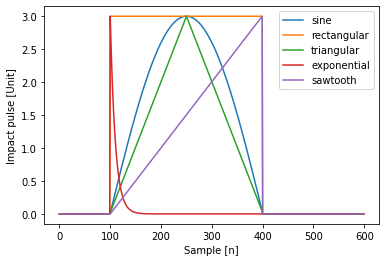

In [6]:
plt.plot(pulse_sine, '-', label='sine')
plt.plot(pulse_rectangular, '-', label='rectangular')
plt.plot(pulse_triangular, '-', label='triangular')
plt.plot(pulse_exponential, '-', label='exponential')
plt.plot(pulse_sawtooth, '-', label='sawtooth')
plt.xlabel('Sample [n]')
plt.ylabel('Impact pulse [Unit]')
plt.legend(loc='upper right');

## Non-stationary non-Gaussian excitation

In [7]:
N = 2 ** 16  # number of data points of time signal
fs = 1024  # sampling frequency [Hz]
t = np.arange(0, N) / fs  # time vector

# define frequency vector and one-sided flat-shaped PSD
M = N // 2 + 1  # number of data points of frequency vector
freq = np.arange(0, M, 1) * fs / N  # frequency vector
freq_lower = 50  # PSD lower frequency limit  [Hz]
freq_upper = 100  # PSD upper frequency limit [Hz]
PSD = es.get_psd(freq, freq_lower, freq_upper)  # one-sided flat-shaped PSD

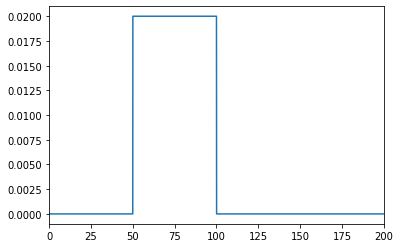

In [8]:
plt.plot(freq, PSD)
plt.xlim(0, 200)
plt.show()

In [9]:
# get gaussian stationary signal
gausian_signal = es.random_gaussian(N, PSD, fs)
# calculate kurtosis
k_u_stationary = es.get_kurtosis(gausian_signal)
k_u_stationary

3.0259950973836847

In [10]:
# get non-gaussian stationary signal, with kurtosis k_u=10
k_u_target = 10
nongausian_signal = es.stationary_nongaussian_signal(
    N, PSD, fs, k_u=k_u_target
)
# calculate kurtosis
k_u_stationary_nongaussian = es.get_kurtosis(nongausian_signal)
k_u_stationary_nongaussian

11.593398319079688

In [11]:
# get non-gaussian non-stationary signal, with kurtosis k_u=10
# a) amplitude modulation, modulating signal defined by PSD
PSD_modulating = es.get_psd(freq, freq_lower=1, freq_upper=5)

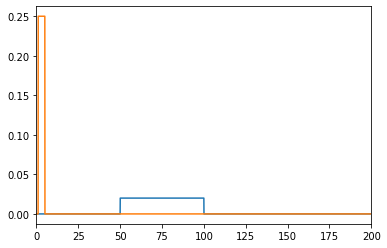

In [12]:
plt.plot(freq, PSD)
plt.plot(freq, PSD_modulating)
plt.xlim(0, 200)
plt.show()

In [13]:
# define array of parameters delta_m and p
delta_m_list = np.arange(0.1, 2.1, 0.25)
p_list = np.arange(0.1, 2.1, 0.25)
# get signal
nongausian_nonstationary_signal_psd = es.nonstationary_signal(
    N,
    PSD,
    fs,
    k_u=k_u_target,
    modulating_signal=('PSD', PSD_modulating),
    param1_list=delta_m_list,
    param2_list=p_list
)
# calculate kurtosis
k_u_nonstationary_nongaussian_psd = es.get_kurtosis(
    nongausian_nonstationary_signal_psd
)

In [14]:
# b) amplitude modulation, modulating signal defined by cubis spline intepolation. Points are based on beta distribution
# Points are separated by delta_n = 2**8 samples (at fs=2**10)
delta_n = 2 ** 8
# define array of parameters alpha and beta
alpha_list = np.arange(1, 10, 1)
beta_list = np.arange(1, 10, 1)
# get signal
nongausian_nonsttaionary_signal_beta = es.nonstationary_signal(
    N,
    PSD,
    fs,
    k_u=k_u_target,
    modulating_signal=('CSI', delta_n),
    param1_list=alpha_list,
    param2_list=beta_list
)
# calculate kurtosis
k_u_nonstationary_nongaussian_beta = es.get_kurtosis(
    nongausian_nonsttaionary_signal_beta
)

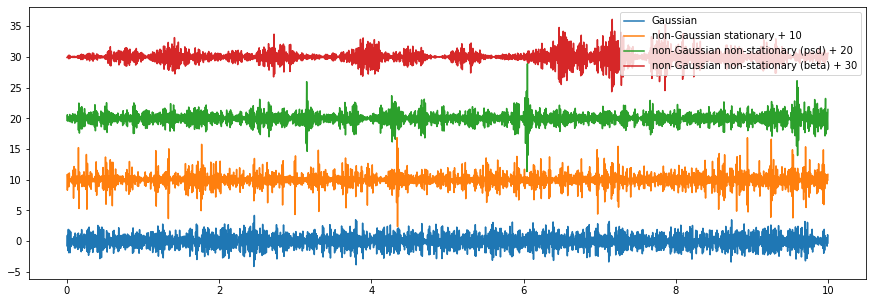

In [15]:
t_indx = np.logical_and(t >= 0, t < 10)
plt.figure(figsize=(15, 5))
plt.plot(t[t_indx], gausian_signal[t_indx], label='Gaussian')
plt.plot(t[t_indx], 10+nongausian_signal[t_indx], label='non-Gaussian stationary + 10')
plt.plot(
    t[t_indx],
    20+nongausian_nonstationary_signal_psd[t_indx],
    label='non-Gaussian non-stationary (psd) + 20'
)
plt.plot(
    t[t_indx],
    30+nongausian_nonsttaionary_signal_beta[t_indx],
    label='non-Gaussian non-stationary (beta) + 30'
)
plt.legend();

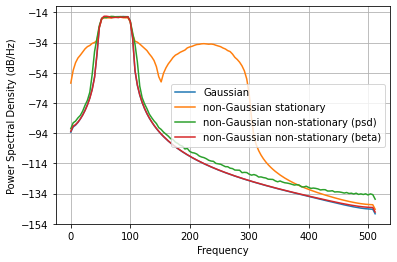

In [16]:
plt.psd(gausian_signal, Fs=fs, label='Gaussian')
plt.psd(nongausian_signal, Fs=fs, label='non-Gaussian stationary')
plt.psd(nongausian_nonstationary_signal_psd, Fs=fs, label = 'non-Gaussian non-stationary (psd)')
plt.psd(nongausian_nonsttaionary_signal_beta, Fs=fs, label='non-Gaussian non-stationary (beta)')
plt.legend();